Importing the dependencies

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pickle


Data collection and Processing

In [7]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('content/loan prediction data.csv')

In [8]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [9]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,GRE score,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,310,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,297,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,314,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,320,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,305,Y


In [10]:
# the number of rows and colomns 
loan_dataset.shape

(614, 14)

In [11]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,GRE score
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,284.526059
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,72.553441
min,150.000000,0.000000,9.000000,12.00000,0.000000,10.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,290.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,307.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,321.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,565.000000


In [12]:
# number of missing values in each colomn
loan_dataset.isnull().sum()

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
GRE score             0
Loan_Status           0
dtype: int64

In [13]:
# dropping all the missing values
loan_dataset = loan_dataset.dropna()

In [14]:
# number of missing values in each colomn
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
GRE score            0
Loan_Status          0
dtype: int64

In [15]:
# lable encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [16]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,GRE score,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,297,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,314,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,320,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,305,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,301,1


In [17]:
# dependent column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     42
Name: Dependents, dtype: int64

In [18]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [19]:
# dependent values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     42
Name: Dependents, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

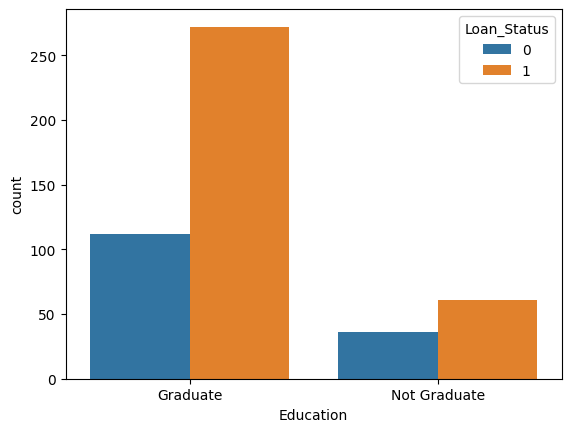

In [20]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

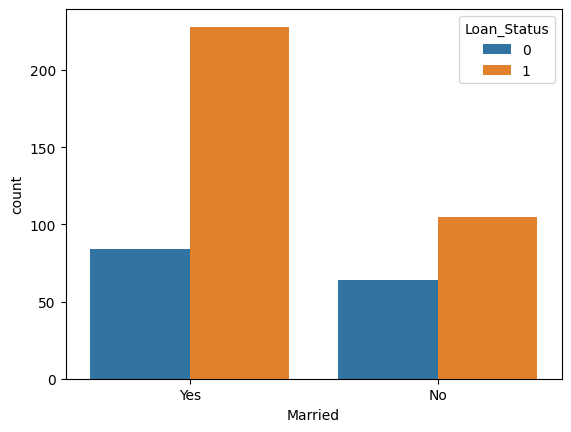

In [21]:
# marital status and Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='GRE score', ylabel='count'>

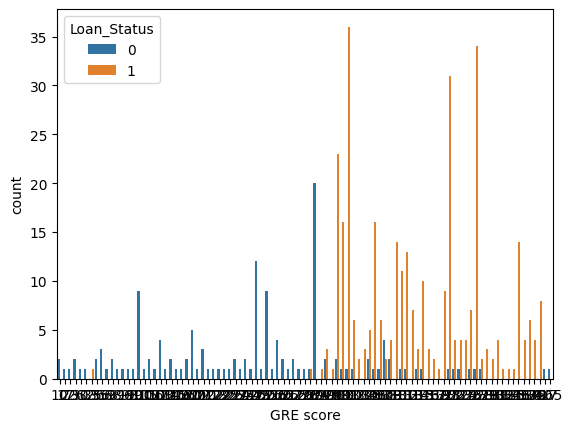

In [22]:
sns.countplot(x='GRE score',hue='Loan_Status',data=loan_dataset)

In [23]:
# convert catagorical colomns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [24]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,GRE score,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,297,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,314,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,320,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,305,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,301,1


In [25]:
# seperating data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [26]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Data Standardization

In [27]:
scaler = StandardScaler()


In [28]:
scaler.fit(X)

StandardScaler()

In [29]:
standardized_data = scaler.transform(X)

In [30]:
print(standardized_data)

[[ 0.46660639  0.73598007  0.1064092  ...  0.41269396 -1.31512091
   0.17834197]
 [ 0.46660639  0.73598007 -0.70601662 ...  0.41269396  1.26155183
   0.41400815]
 [ 0.46660639  0.73598007 -0.70601662 ...  0.41269396  1.26155183
   0.49718445]
 ...
 [ 0.46660639  0.73598007  0.1064092  ...  0.41269396  1.26155183
   0.49718445]
 [ 0.46660639  0.73598007  0.91883503 ...  0.41269396  1.26155183
   0.49718445]
 [-2.14313398 -1.35873244 -0.70601662 ... -2.42310309 -0.02678454
  -2.48329959]]


Train Test Split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(481, 12) (384, 12) (97, 12)


Training the model:
support vector machine model

In [33]:
classifier = svm.SVC(kernel='linear')

In [34]:
# training the support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [36]:
pickle.dump(classifier, open("model.pkl", "wb"))

Model Evaluation

In [ ]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('accuracy on training data : ',training_data_accuracy)

accuracy on training data :  0.9166666666666666


In [ ]:
# accuracy score on testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('accuracy on testing data : ',testing_data_accuracy)

accuracy on testing data :  0.8969072164948454


Making a predictive system


In [ ]:
prediction = [[1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,314]]





In [ ]:
result = classifier.predict(prediction)
if (result[0] == 0):
  print('no loan can be granted')
else :
  
  print('loan can be granted')

loan can be granted


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
prediction = [[0,0,1,0,0,4000,1.0,45.0,220.0,0.0,1,204]]

In [ ]:
result = classifier.predict(prediction)
if (result[0] == 0):
  print('no loan can be granted')
else :
  
  print('loan can be granted')

no loan can be granted


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
